In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [290]:
keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              verbose=0, mode='auto')

https://blog.keras.io/building-autoencoders-in-keras.html

In [5]:
#
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

********************************

In [51]:
input_img = keras.Input(shape=(8, 8, 1))
x = layers.Conv2D(8, (2, 2), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((1, 1), padding='same')(x)
x = layers.Conv2D(6, (1, 1), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((1, 1), padding='same')(x)
x = layers.Conv2D(6, (1, 1), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((1, 1), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(6, (1, 1), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((1, 1))(x)
x = layers.Conv2D(6, (1, 1), activation='relu', padding='same')(x)
x = layers.UpSampling2D((1, 1))(x)
x = layers.Conv2D(8, (2, 2), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
digits = load_digits()

In [15]:
digits.data.shape

(1797, 64)

In [17]:
digits = load_digits()
x_train, y = digits.data, digits.target

x_train = x_train.astype('float32') / 255.
x_test = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 8, 8, 1))
x_test = np.reshape(x_train, (len(x_test), 8, 8, 1))

In [52]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=150,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1797 samples, validate on 1797 samples
Epoch 1/50
1797/1797 [==============================] - 1s 306us/step - loss: 0.6877 - val_loss: 0.6808
Epoch 2/50
1797/1797 [==============================] - 0s 138us/step - loss: 0.6741 - val_loss: 0.6654
Epoch 3/50
1797/1797 [==============================] - 0s 153us/step - loss: 0.6564 - val_loss: 0.6444
Epoch 4/50
1797/1797 [==============================] - 0s 159us/step - loss: 0.6316 - val_loss: 0.6144
Epoch 5/50
1797/1797 [==============================] - 0s 136us/step - loss: 0.5964 - val_loss: 0.5728
Epoch 6/50
1797/1797 [==============================] - 0s 141us/step - loss: 0.5492 - val_loss: 0.5191
Epoch 7/50
1797/1797 [==============================] - 0s 154us/step - loss: 0.4905 - val_loss: 0.4553
Epoch 8/50
1797/1797 [==============================] - 0s 166us/step - loss: 0.4242 - val_loss: 0.3872
Epoch 9/50
1797/1797 [==============================] - 0s 151us/step - loss: 0.3571 - val_loss: 0.3228
Epoch 10/50
1797

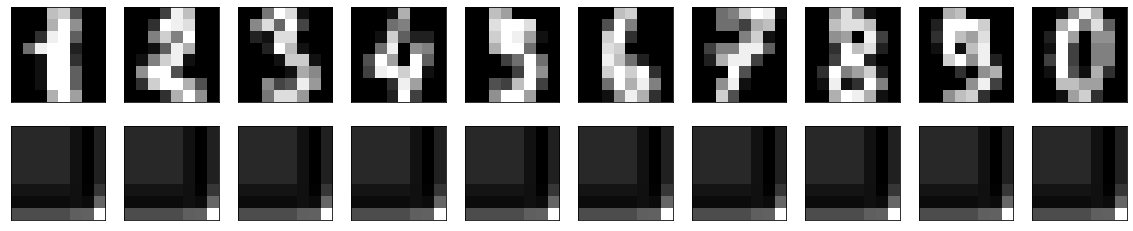

In [53]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

0
1
2
3
4
5
6
7
8
9


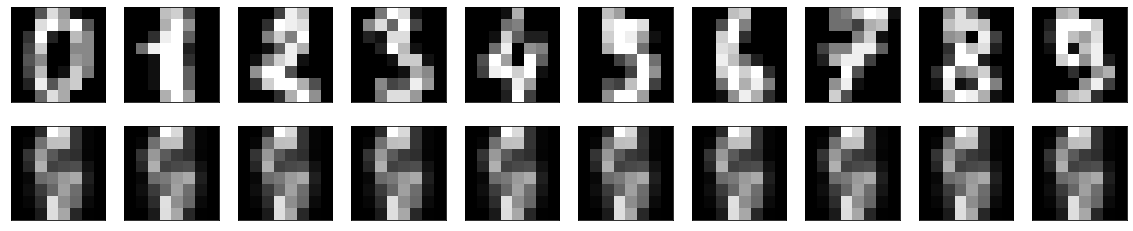

In [49]:

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    print(y[i])
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow((x_test[i]).reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((predict_imgs[i]).reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
def scatter_plot(x, y, title):# two dimension plot
    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
    plt.subplot(1, 2, 1)
    plt.scatter(
    x[:, 0],
    x[:, 1],
    marker=".",
    color='w',
    edgecolors=[sns.color_palette(n_colors=15)[j] for j in y]
    )
    plt.title(title, fontsize=10)


***********************************************

In [34]:
# This is the size of our encoded representations
encoding_dim = 8  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(64,))
# "encoded" is the encoded representation of the input
x = layers.Dense(32, activation='selu')(input_img)
x = layers.Dense(16, activation='selu')(x)
encoded = layers.Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input
x = layers.Dense(16, activation='selu')(encoded)
x = layers.Dense(32, activation='selu')(x)
decoded = layers.Dense(64, activation='sigmoid')(x)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [35]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [43]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
#autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
digits = load_digits()
#digits = datasets.load_iris()
x_train, y = digits.data, digits.target

x_train = x_train.astype('float32') / 255.
x_test = x_train.astype('float32') / 255.
#x_train = np.reshape(x_train, (len(x_train), 8, 8, 1))
#x_test = np.reshape(x_train, (len(x_test), 8, 8, 1))

In [521]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1),
]

In [45]:
#autoencoder.fit(x_train, x_train,
#                epochs=100,
#                batch_size=256,
#                shuffle=True,
#                validation_data=(x_test, x_test),callbacks=callbacks)
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 1797 samples, validate on 1797 samples
Epoch 1/100
1797/1797 [==============================] - 0s 19us/step - loss: 0.0831 - val_loss: 0.0157
Epoch 2/100
1797/1797 [==============================] - 0s 27us/step - loss: 0.0830 - val_loss: 0.0160
Epoch 3/100
1797/1797 [==============================] - 0s 25us/step - loss: 0.0830 - val_loss: 0.0158
Epoch 4/100
1797/1797 [==============================] - 0s 28us/step - loss: 0.0830 - val_loss: 0.0157
Epoch 5/100
1797/1797 [==============================] - 0s 27us/step - loss: 0.0830 - val_loss: 0.0160
Epoch 6/100
1797/1797 [==============================] - 0s 28us/step - loss: 0.0830 - val_loss: 0.0160
Epoch 7/100
1797/1797 [==============================] - 0s 31us/step - loss: 0.0829 - val_loss: 0.0158
Epoch 8/100
1797/1797 [==============================] - 0s 27us/step - loss: 0.0829 - val_loss: 0.0160
Epoch 9/100
1797/1797 [==============================] - 0s 27us/step - loss: 0.0829 - val_loss: 0.0160
Epoch 10/100
179

1797/1797 [==============================] - 0s 25us/step - loss: 0.0823 - val_loss: 0.0089
Epoch 79/100
1797/1797 [==============================] - 0s 24us/step - loss: 0.0823 - val_loss: 0.0089
Epoch 80/100
1797/1797 [==============================] - 0s 24us/step - loss: 0.0823 - val_loss: 0.0089
Epoch 81/100
1797/1797 [==============================] - 0s 25us/step - loss: 0.0823 - val_loss: 0.0089
Epoch 82/100
1797/1797 [==============================] - 0s 29us/step - loss: 0.0823 - val_loss: 0.0088
Epoch 83/100
1797/1797 [==============================] - 0s 31us/step - loss: 0.0823 - val_loss: 0.0088
Epoch 84/100
1797/1797 [==============================] - 0s 21us/step - loss: 0.0823 - val_loss: 0.0087
Epoch 85/100
1797/1797 [==============================] - 0s 19us/step - loss: 0.0823 - val_loss: 0.0088
Epoch 86/100
1797/1797 [==============================] - ETA: 0s - loss: 0.082 - 0s 23us/step - loss: 0.0823 - val_loss: 0.0087
Epoch 87/100
1797/1797 [====================

In [46]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)
predict_imgs = autoencoder.predict(x_test)

In [40]:
x_test

array([[0.0000000e+00, 0.0000000e+00, 7.6893506e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5378701e-04,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4605924e-04,
        1.3840832e-04, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.5378702e-05, ..., 9.2272203e-05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.0757405e-05, ..., 1.8454441e-04,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.5378701e-04, ..., 1.8454441e-04,
        1.5378702e-05, 0.0000000e+00]], dtype=float32)

In [47]:
predict_imgs

array([[3.69413087e-08, 1.26657178e-04, 5.54106291e-03, ...,
        5.05565712e-03, 2.49028002e-04, 1.32263049e-05],
       [3.69047548e-08, 1.28122250e-04, 5.50210709e-03, ...,
        5.09212073e-03, 2.53017613e-04, 1.35037180e-05],
       [3.69924997e-08, 1.28165615e-04, 5.50359208e-03, ...,
        5.11575257e-03, 2.54968734e-04, 1.36016342e-05],
       ...,
       [3.70947362e-08, 1.27993175e-04, 5.51608903e-03, ...,
        5.09469165e-03, 2.53172300e-04, 1.35099517e-05],
       [3.68534785e-08, 1.27512001e-04, 5.53496275e-03, ...,
        5.09063248e-03, 2.52049940e-04, 1.34053034e-05],
       [3.70103521e-08, 1.28260741e-04, 5.54071087e-03, ...,
        5.11948438e-03, 2.55550898e-04, 1.36508315e-05]], dtype=float32)

In [48]:
encoded_imgs

array([[1.8012635, 0.       , 3.3261747, ..., 2.3082018, 3.507943 ,
        2.5596309],
       [1.804171 , 0.       , 3.3127534, ..., 2.309541 , 3.510421 ,
        2.555829 ],
       [1.8019018, 0.       , 3.3122947, ..., 2.3122237, 3.5072148,
        2.5559216],
       ...,
       [1.8013264, 0.       , 3.3135915, ..., 2.3088164, 3.5076406,
        2.5573835],
       [1.8007274, 0.       , 3.3220186, ..., 2.312127 , 3.509466 ,
        2.5569592],
       [1.7990681, 0.       , 3.314056 , ..., 2.3130953, 3.50641  ,
        2.5608697]], dtype=float32)

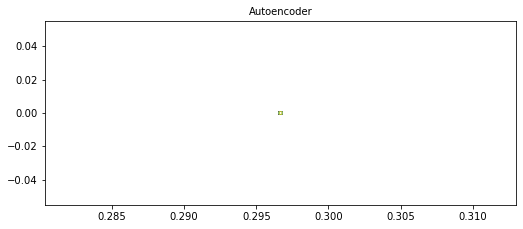

In [136]:
scatter_plot(encoded_imgs, y, 'Autoencoder')

In [445]:
x_test

array([[0.0000000e+00, 0.0000000e+00, 7.6893506e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5378701e-04,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4605924e-04,
        1.3840832e-04, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.5378702e-05, ..., 9.2272203e-05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.0757405e-05, ..., 1.8454441e-04,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.5378701e-04, ..., 1.8454441e-04,
        1.5378702e-05, 0.0000000e+00]], dtype=float32)

In [14]:
def scatterplot(x, y, title):
    dset = np.append(x,y.reshape([len(y),1]),axis=1)
    df = pd.DataFrame(dset, columns=['C1','C2','T'])
    df['T'] = df['T'].astype('str')
    sns.scatterplot(x="C1", y="C2",
                    palette="pastel", linewidth=0,
                    hue='T',
                    data=df)

In [12]:
from sklearn.manifold import TSNE

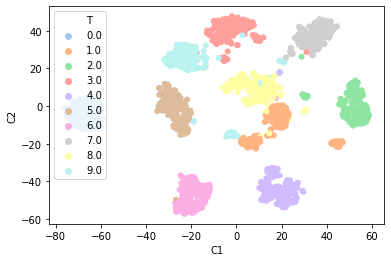

In [456]:
tSNE_x = TSNE(n_components=2).fit_transform(x_test)
scatterplot(tSNE_x, y, 'tSNE')

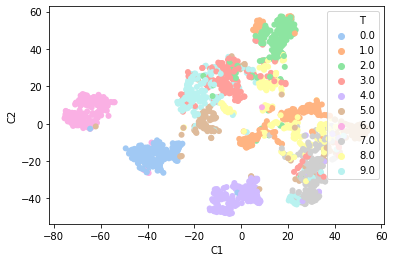

In [50]:
tSNE_x = TSNE(n_components=2).fit_transform(encoded_imgs)
scatterplot(tSNE_x, y, 'tSNE')

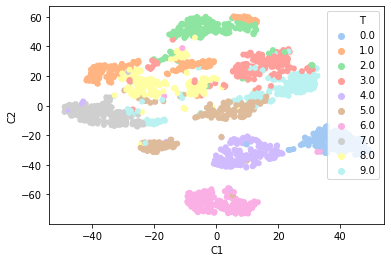

In [30]:
tSNE_x = TSNE(n_components=2).fit_transform(predict_imgs)
scatterplot(tSNE_x, y, 'tSNE')